# Modélisation Mathématique: contrôle continu (CC)

**Novembre 2023**

- Travail individuel.
- Toute documentation autorisée.
- Internet autorisé, à l'exception des outils de type Chat GPT ainsi que tout moyen de communication entre vous.

## Librairies

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## Exercice 1

Exécutez les cellules ci-dessous.

In [2]:
# generate data
X, y = make_blobs(n_samples=200, 
                  n_features=2, 
                  centers=2, 
                  cluster_std=1,
                  random_state=42)

In [3]:
# separation line

from sklearn.linear_model import Perceptron
model = Perceptron().fit(X, y)
coef = model.coef_[0]

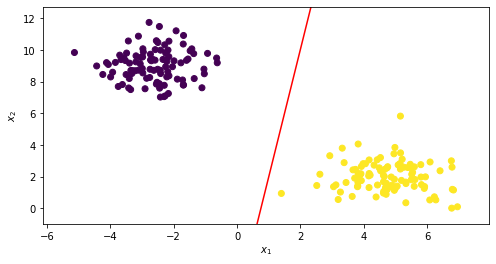

In [5]:
# plot
plt.figure(figsize=(8,4))

x_min, x_max = np.min(X[:,0]), np.max(X[:,0])
y_min, y_max = np.min(X[:,1]), np.max(X[:,1])

x = np.linspace(x_min, x_max)
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x, coef[0]*x + coef[1], color="red")

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.xlim([x_min-1, x_max+1])
plt.ylim([y_min-1, y_max+1])

plt.show()

Soient `X, y` les data représentées ci-dessus, où `X` représente un ensemble de points (2D) et `y` la classe (couleur) à laquelle ils appartiennent. 

- Implémentez un algoriithme (simple) pour déterminer l'équation d'une droite qui sépare les data correctement (cf. droite rouge ci-dessus).

 Par exemple, une idée simple serait de faire varier la pente et l'ordonnée à l'origine de la droite jusqu'à obtenir une séparation parfaite des data.

## Exercice 2

Soit le **train set** $S_{\rm train} = \left\{ \left( \boldsymbol{x_1}, y_1 \right), \dots, \left( \boldsymbol{x_N}, y_N \right) \right\}$ composé de $N$ observations. 
La matrice des **features** $\boldsymbol{X}$ et le vecteur (ou matrice) des **targets** $\boldsymbol{y}$ sont définis de la manière suivante:

$$
\boldsymbol{X} =
\begin{pmatrix}
1 & \boldsymbol{x_1}^T \\
\vdots & \vdots \\
1 & \boldsymbol{x_N}^T 
\end{pmatrix}
=
\begin{pmatrix}
1 & x_{11} & \cdots & x_{1p} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{N1} &\cdots & x_{Np}
\end{pmatrix}~
\text{  et  }~
\boldsymbol{y} =
\begin{pmatrix}
y_1 \\
\vdots \\
y_N 
\end{pmatrix}
$$


La solution de la **régression linéaire** est le vecteur de coefficients $\boldsymbol{\hat \beta}$ qui satisfait (cf. cours)

$$
\boldsymbol{\hat{\beta}} 
= \underset{\boldsymbol{\beta}}{\arg \min} \, \left\| \boldsymbol{X} \boldsymbol{\beta} - \boldsymbol{y} \right\|^2
$$


- Étant donné les data `X, y` ci-dessous, implémentez une **descente de gradient** – et non la solution analytique vue en cours – pour déterminer le vecteur de paramêtres $\boldsymbol{\hat{\beta}}$ qui minimise l'expression ci-dessus.

 Dans votre algorithme, vous pouvez utiliser comme learning rate et toléreece `lamda=1e-3, epsilon=1e-3`.
 
 Votre solution vous paraît-elle correcte? Justifiez.
 
 
- **(Bonus)** Êtes-vous capable de généraliser votre algorithme au cas de la **régression Ridge**?

In [6]:
# data

X = np.random.uniform(-1, 1, size=(200,3))
coeff = np.random.uniform(-5, 5, size=(4))
noise = np.random.normal(0, 1, size=(200))
y = coeff[0] + coeff[1]*X[:,0] + coeff[2]*X[:,1] + coeff[3]*X[:,2] + noise

In [7]:
X.shape, y.shape

((200, 3), (200,))

## Exercice 3

Exécutez les cellules ci-dessous.

In [8]:
# data
betas = np.array([5.3, -2.1])

X_1 = np.random.uniform(-5, 1, size=(100))
y_1 = betas[0] + betas[1]*X_1 + np.random.normal(0, 3, size=(100))

X_2 = np.random.uniform(1, 5, size=(100))
y_2 = betas[0] - betas[1]*X_2 + np.random.normal(0, 3, size=(100))

X = np.concatenate([X_1, X_2])
y = np.concatenate([y_1, y_2])

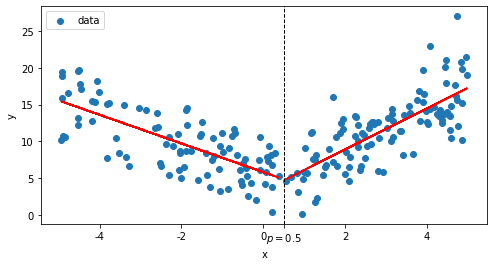

In [9]:
# plot
plt.figure(figsize=(8,4))

p = 0.5
X_tmp_1 = np.vstack([X[X<=p], np.ones(len(X[X<=p]))]).T
m_1, h_1 = np.linalg.lstsq(X_tmp_1, y[X<=p], rcond=None)[0]

X_tmp_2 = np.vstack([X[X>p], np.ones(len(X[X>p]))]).T
m_2, h_2 = np.linalg.lstsq(X_tmp_2, y[X>p], rcond=None)[0]

plt.scatter(X, y, label="data", color="C0")
plt.plot(X_tmp_1, m_1*X_tmp_1 + h_1, color="red")
plt.plot(X_tmp_2, m_2*X_tmp_2 + h_2, color="red")
plt.axvline(0.5, color='black', linestyle='--', linewidth=1)

plt.xlabel("x")
plt.xticks([-4, -2, 0, 0.5, 2, 4], [-4, -2, 0, r"$p = 0.5$", 2, 4])
plt.ylabel("y")

plt.legend()
plt.show()

1. Ajustez deux **régression linéaires** sur les data `X, y`, comme illustré ci-dessus: 
    - la première régression porte sur les data $(x_i, y_i)$ telles que $x_i \leq p$, (où $p = 0.5$)
    - la seconde régression porte sur les data $(x_i, y_i)$ telles que $x_i > p$ (où $p = 0.5$).
    
 Donnez les coefficients et faites le graphe des régressions linéaires que vous avez obtenues. Vous devriez un plot similaire à celui ci-dessus.


2. Calculer la **mean squared error (MSE)** relative à votre double régression.


3. Faites variez le point $p$ entre $0$ et $1$ pour chercher la valeur de $p$ qui donne lieu à une MSE minimale.